<a href="https://colab.research.google.com/github/Aravind0523/Aravind1/blob/main/Aravind%20Chennai%20House%20Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor


In [22]:
df = pd.read_csv('/train-chennai-sale.csv')
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [23]:
#Dropping Unwanted Columns
df.drop(df.columns[[0, 19, 20]], axis=1, inplace=True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [24]:
df.shape

(7109, 19)

In [25]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [26]:
print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [27]:
df['N_BEDROOM'].fillna('1.0', inplace=True)

In [28]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [29]:
df['N_BATHROOM'].fillna('1.0', inplace=True)

In [30]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [31]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].median(),inplace=True)

In [32]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

There is no Null Values after Imputation

Dropping Duplicates

In [33]:
df = df.drop_duplicates()
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [34]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [35]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BATHROOM"]=df["N_BATHROOM"].astype(float)
df["N_BEDROOM"]=df["N_BEDROOM"].astype(float)

In [36]:
df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [37]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

All Column Changed to proper Datatype

In [38]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


Describing the Numerical Columns

In [39]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


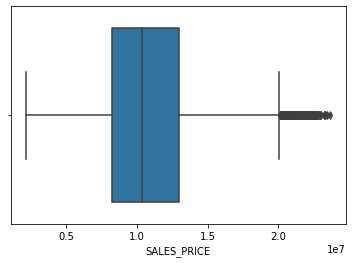

In [40]:
sns.boxplot(df['SALES_PRICE'])

Finding IQR

In [41]:
percentile25 = df['SALES_PRICE'].quantile(0.25)
percentile75 = df['SALES_PRICE'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  8272100.0
75th percentile of the data is  12993900.0
IQR : 4721800.0


Calculating Minimum & Maximum Limits

In [42]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

20076600.0
1189400.0


Removing Outliers By Capping Technique

In [43]:
df['SALES_PRICE'] = np.where(
    df['SALES_PRICE']>max_value,
    max_value,
    np.where(
        df['SALES_PRICE']<min_value,
        min_value,
        df['SALES_PRICE']
        )
    )
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.085674e+07
std      3.664953e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.007660e+07
Name: SALES_PRICE, dtype: float64

After Removing Outliers

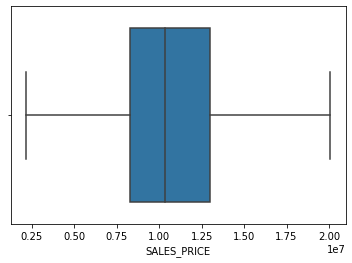

In [44]:
sns.boxplot(df['SALES_PRICE'])

Checking Unique Elements in Categorical Columns

In [45]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [46]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Chrompet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],'T Nagar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr','NoSewr '],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [47]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar' 'Chormpet']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [48]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

EDA

EDA for Categorical Columns
  

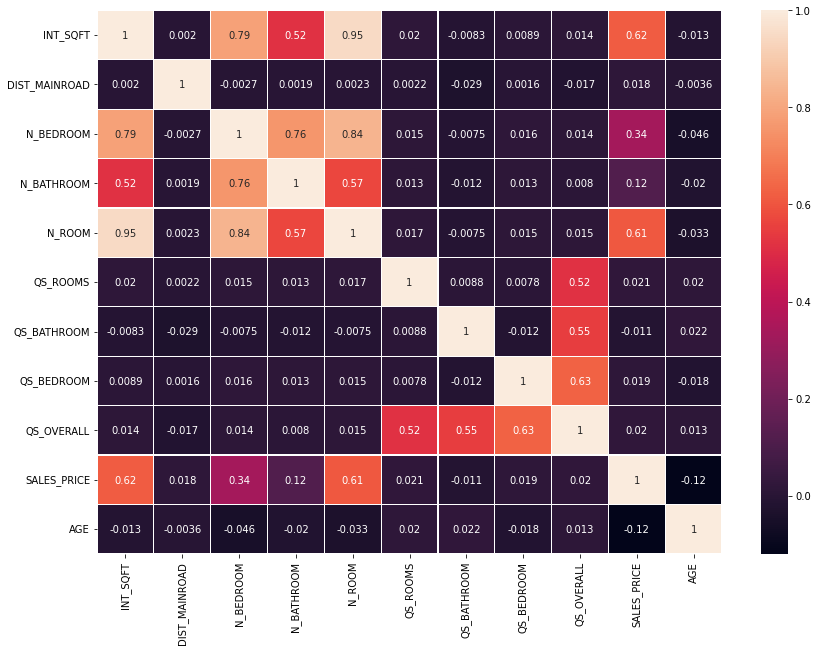

In [49]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

SALES_PRICE is The Target Variable

Some other Features have strong Co-Relation with Respect to INT_SQFT, N_BATHROOM,N_BEDROOM

Some Features have weak Co-Relation with respect to QS_ROOMS, QS_BEDROOM, QS_BATHROOM, QS_OVERALL

Checking Relation in between Area Feature and SALES_PRICE Target Columns

In [50]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

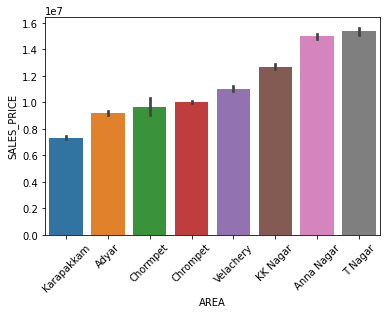

In [51]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)
plt.xticks(rotation=45)

Anna Nagar & T Nagar are the area's with Highest Sales Price.

Checking Relation Between SALE_COND and SALE_PRICE

In [52]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

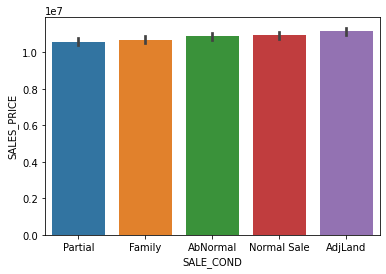

In [53]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = sale_cond_order)


Checking Relation Between *PARK_FACIL* and SALE_PRICE

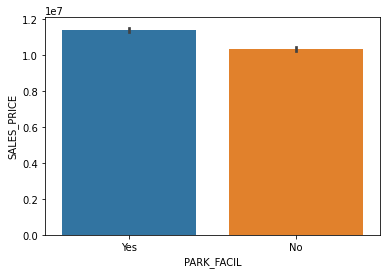

In [54]:
 sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)

HOUSE WITH PARKING IS MORE EXPENSIVE THAN THE HOUSE WITH NO PARKING

<function matplotlib.pyplot.show(*args, **kw)>

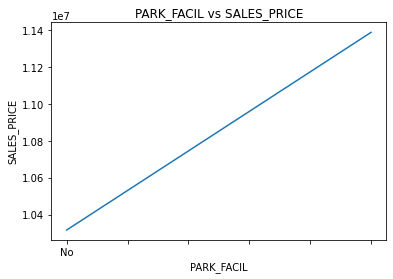

In [55]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.title('PARK_FACIL vs SALES_PRICE')
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.show

There is a Strong Linear Relationship btwn PARK_FACIL Feature and SALES_PRICE
This Feature is very useful for Modelfitting

Checking Relation Between BUILDTYPE and SALE_PRICE




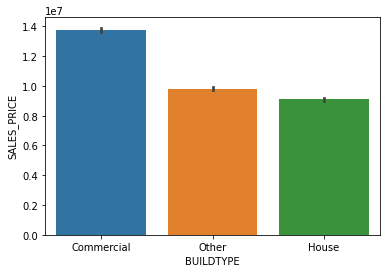

In [56]:
 sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)

COMMERCIAL BUILDINGS ARE MORE EXPENSIVE

<function matplotlib.pyplot.show(*args, **kw)>

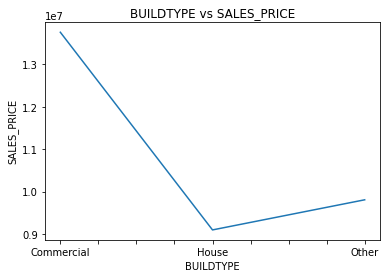

In [57]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot()
plt.title('BUILDTYPE vs SALES_PRICE')
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.show

There is a Relationship btwn BUILDTYPE Feature and SALES_PRICE.

Checking Relation Between UTILITY_AVAIL and SALE_PRICE

In [58]:
utility_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

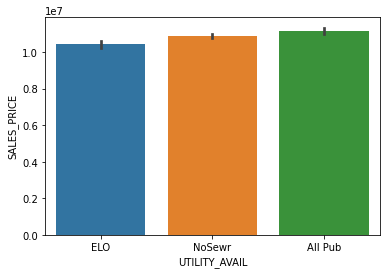

In [59]:
 sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = utility_avail_order)

There is a good Relationship btwn UTILITY_AVAIL Feature and SALES_PRICE.

<function matplotlib.pyplot.show(*args, **kw)>

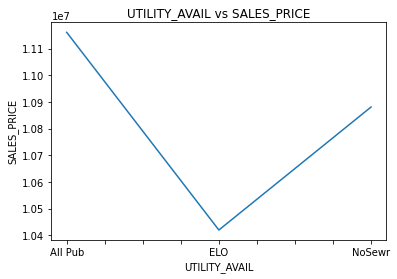

In [60]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.show

Checking Relation Between UTILITY_AVAIL and SALE_PRICE

In [61]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

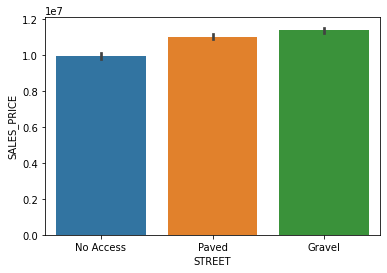

In [62]:
 sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = street_order)

GRAVEL STREET HOUSE ARE MORE EXPENSIVE

<function matplotlib.pyplot.show(*args, **kw)>

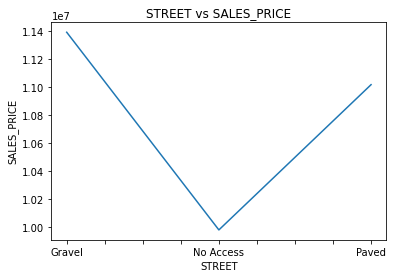

In [63]:
df.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.title('STREET vs SALES_PRICE')
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.show

There is a Relationship btwn STREET Feature and SALES_PRICE.

Checking MZZONE with SALES_PRICE

In [64]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

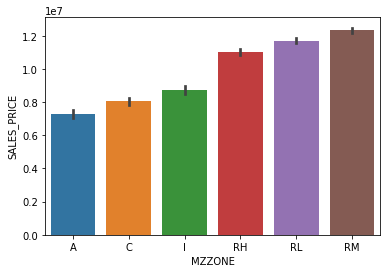

In [65]:
 sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=mzzone_order)

MZZONE with the values RL & RL & RH have higer SALES_PRICE than other Values

<function matplotlib.pyplot.show(*args, **kw)>

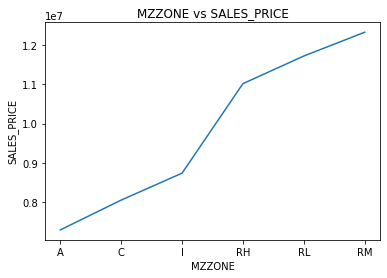

In [66]:
df.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.title('MZZONE vs SALES_PRICE')
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.show

There is a Relationship btwn MZZONE Feature and SALES_PRICE.

Checking N_BEEDROOM with SALES_PRICE

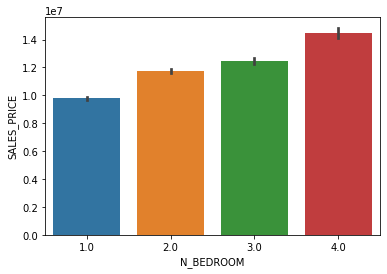

In [67]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

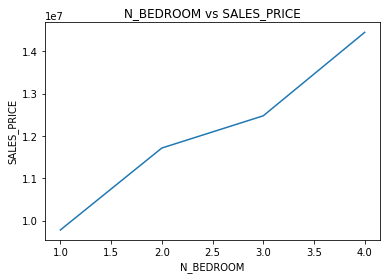

In [68]:
df.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot()
plt.title('N_BEDROOM vs SALES_PRICE')
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.show

There is a positive relationship 

Checking N_BATHROOM with SALES_PRICE

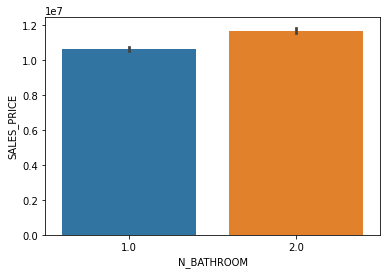

In [69]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

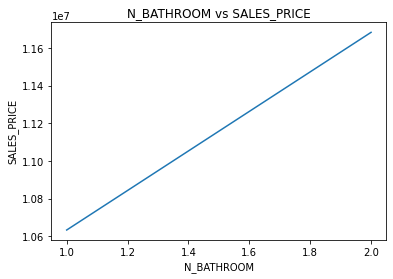

In [70]:
df.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot()
plt.title('N_BATHROOM vs SALES_PRICE')
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.show

There is a Positive relationship

Checking N_ROOM with SALES_PRICE

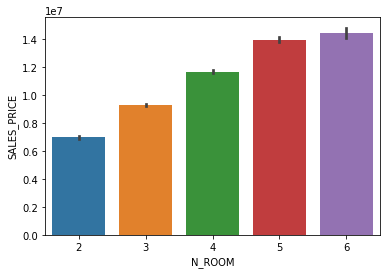

In [71]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

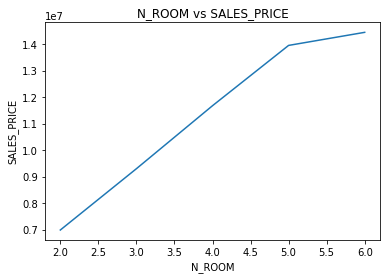

In [72]:
df.groupby('N_ROOM')['SALES_PRICE'].mean().plot()
plt.title('N_ROOM vs SALES_PRICE')
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.show

EDA for Numerical Columns

Checking Linear Relation between INT_SQFT and SALES_PRICE

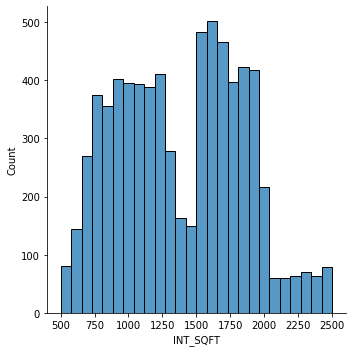

In [73]:
sns.displot(df['INT_SQFT'])

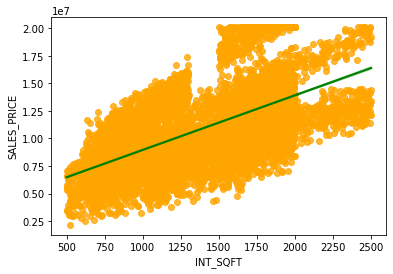

In [74]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color' : 'orange'},line_kws={'color' : 'green'})

There is a Strong Relationship

Checking Linear Relation between DIST_MAINROAD and SALES_PRICE

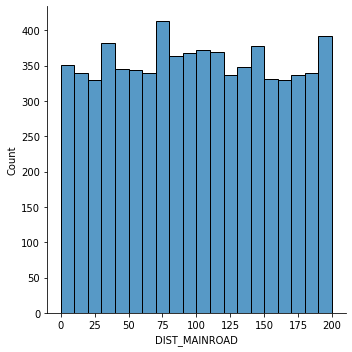

In [75]:
sns.displot(df['DIST_MAINROAD'])

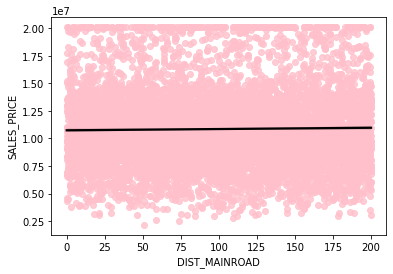

In [76]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

There is no relationship

Checking Linear Relation between QS_ROOMS and SALES_PRICE

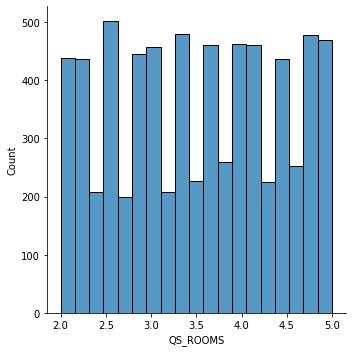

In [77]:
sns.displot(df['QS_ROOMS'])

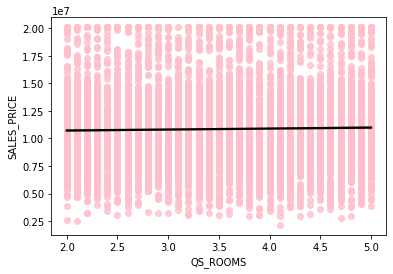

In [78]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

There is no relationship

Checking Linear Relation between QS_BEDROOMS and SALES_PRICE

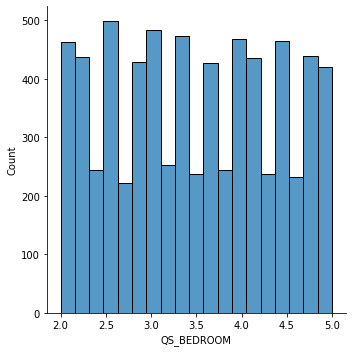

In [79]:
sns.displot(df['QS_BEDROOM'])

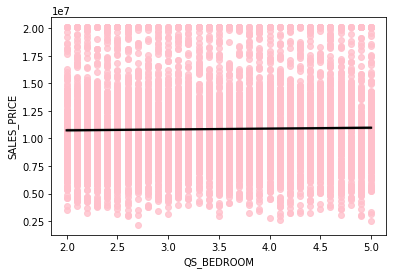

In [80]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

NO Relation Drop Feature

Checking Linear Relation between QS_BATHROOM and SALES_PRICE

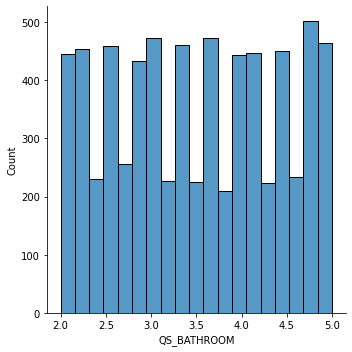

In [81]:
sns.displot(df['QS_BATHROOM'])

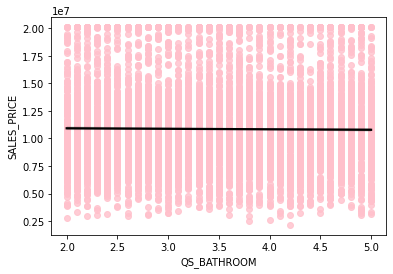

In [82]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

NO Relation Drop Feature

Relation Between QS_OVERALL and SALES_PRICE

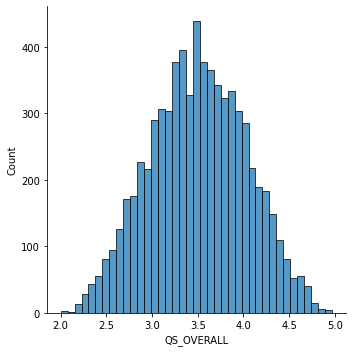

In [83]:
sns.displot(df['QS_OVERALL'])

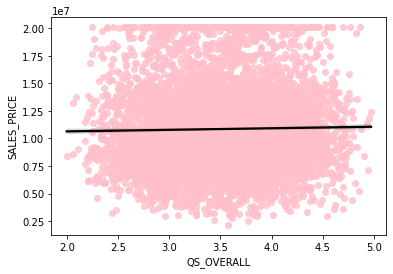

In [84]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

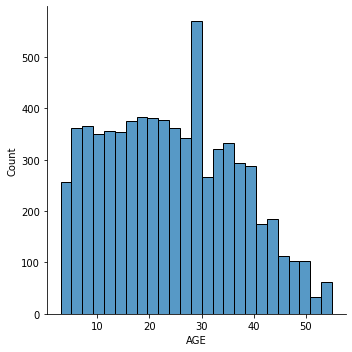

In [85]:
sns.displot(df['AGE'])

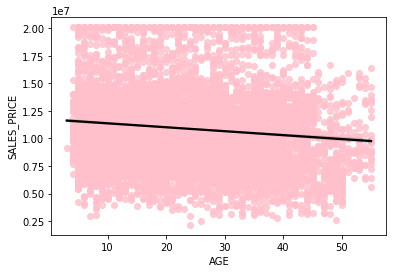

In [86]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color' : 'pink'},line_kws={'color' : 'black'})

We found Negative Relation between AGE and SALES_PRICE

Insights 

1.   The Distribution of the Data in the columnsare normally distributed. In Some Columns the datas are slightly skewed
2.   We will use the Featuresn which have relationship with SALES_PRICE other features can be dropped.

